## <center>Swedish Auto Insurance Claims</center>

<center>Simple dataset to practice Regression Models. This dataset has just 2 column: X = number of claims, and Y = total payment for the claims in thousands of Swedish Kronor</center>
<left><strong>Reference:</strong><br>Swedish Committee on Analysis of Risk Premium in Motor Insurance
http://college.hmco.com/mathematics/brase/understandable_statistics/7e/students/datasets/slr/frames/frame.html

### I. Importing needed libraries

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

### II. Reading the dataset, and assigning X and Y

In [5]:
data = pd.read_csv("data.csv")
X = data.iloc[:, 0:1].values
y = data.iloc[:, -1].values

### III. Visualization (to understand interpret the data)

##### 1. Scatter Plots

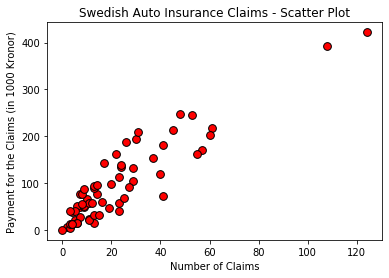

In [6]:
plt.scatter(X, y, s = 60, c = 'red', marker = 'o', edgecolor = 'black')
plt.title("Swedish Auto Insurance Claims - Scatter Plot")
plt.xlabel("Number of Claims")
plt.ylabel("Payment for the Claims (in 1000 Kronor)")
plt.show()

<strong>Observation:</strong><br>
Scatter plot for this dataset gives us a very simple observation - more the number of claims, more the payment is. The realtionship between X and y variables is a<strong> POSITIVE CORRELATION </strong>.

##### 2. Box Plots

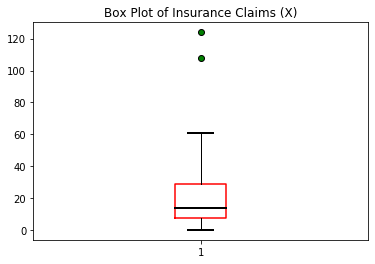

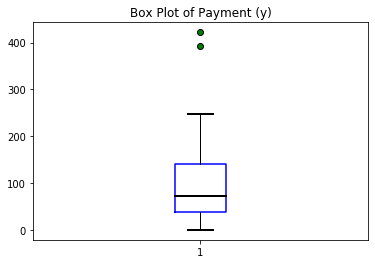

In [7]:
outlier_marker = dict(markerfacecolor='g', marker='o')

fig1, ax1 = plt.subplots()
ax1.set_title("Box Plot of Insurance Claims (X)")
bp1 = ax1.boxplot(X, flierprops=outlier_marker)
for box in bp1['boxes']:
    box.set(color='r', linewidth=1.5)
for median in bp1['medians']:
    median.set(color='black', linewidth=2)
for cap in bp1['caps']:
    cap.set(color='black', linewidth=2)


fig2, ax2 = plt.subplots()
ax2.set_title("Box Plot of Payment (y)")
bp2 = ax2.boxplot(y, flierprops=outlier_marker)
for box in bp2['boxes']:
    box.set(color='b', linewidth=1.5)
for median in bp2['medians']:
    median.set(color='black', linewidth=2)
for cap in bp2['caps']:
    cap.set(color='black', linewidth=2)



A boxplot tells us more about the distribution or spread of the data. It gives us a pictorial representation of how the values in the dataset are spread out. It basically gives us 5-number summary as follows: 
<ul>
    <li><Strong>Minimum</Strong>: The lowest number of the dataset</li>
    <li><Strong>Maximum</Strong>: The highest number of the dataset</li>
    <li><Strong>First Quartile or Q1 or 25th percentile</Strong>: The number between the smallest number and median of the dataset.</li>
    <li><Strong>Second Quartile or Q2 or 50th Percentile or MEDIAN</Strong>: The middle value of the dataset</li>
    <li><Strong>Third Quartile or Q3 or 75th Percentile</Strong>: The number between the median and the highest value of the dataset</li>
    <li><Strong>Outliers</Strong>: Represented in green circles are the outliers. Basically any values that are away from the ditribution or anamalous is termed as outliers.</li>

    
    


<strong>Observation</strong>:<br>
The above two box plots pretty much give us more information about the minimum, maximum, Q1, Q2, and Q3 values. As we can clearly see from the diagram, there are 2 Outliers in our dataset which is away from the norms and is ditributed oddly. Rest all information from the diagram is very intuitive when compared with the dataset. For example:

<ul>
    <li><Strong>Minimum</Strong>: Both the plots almost have a minimum line matching with "0". This can be verified with our scatter plots, looking at the originating area near the origin (0, 0)</li>
    <li><strong>Maximum</strong>: In the box plot for X (number of claims), the maximum value is said to be somewhere above 60. In the plot for y (payment), the max value is around 250. Both of this can be verified with the same scatter plot.</li> 


### IV. Splitting the dataset

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

##### Since this dataset has just one input and one output variable, it would be appropriate to apply the Simple Linear Regression model. 

### V. Simple Linear Regression

##### Fitting Simple Linear Regression to the Training Set

In [115]:
simple_regressor = LinearRegression()
simple_regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

##### Predicting results to the Test Set

In [116]:
y_pred = simple_regressor.predict(X_test)

##### Visualizing the Training Set results

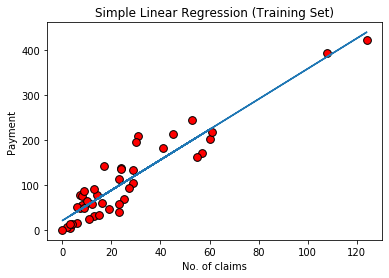

In [117]:
plt.scatter(X_train, y_train, s = 60, c = 'red', marker = 'o', edgecolor = 'black')
plt.plot(X_train, simple_regressor.predict(X_train))
plt.title("Simple Linear Regression (Training Set)")
plt.xlabel("No. of claims")
plt.ylabel("Payment")
plt.show()

##### Visualizing the Test Set results

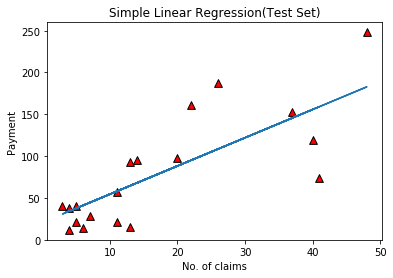

In [118]:
plt.scatter(X_test, y_test, s = 60, c = 'red', marker='^', edgecolor = 'black')
plt.plot(X_test, y_pred)
plt.title("Simple Linear Regression(Test Set)")
plt.xlabel("No. of claims")
plt.ylabel("Payment")
plt.show()


##### Evaluating the model

In [119]:
print("Mean Absolute Error: %0.2f"%(metrics.mean_absolute_error(y_test, y_pred)))
print("Root Mean Squared Error: %0.2f"%(np.sqrt(metrics.mean_squared_error(y_test, y_pred))))
print("R-Squared Score: %0.1f"%(metrics.r2_score(y_test, y_pred)*100),"%")

Mean Absolute Error: 31.03
Root Mean Squared Error: 40.33
R-Squared Score: 62.4 %


Not much of an improvement can be made to this model by tuning the hyperparameters. Coz, as per the parameters given here: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html, there's nothing much we can do about this Ordinary Least Squares Regression.